In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Generate linear data that changes over time to simulate environment drift
np.random.seed(42)
X = np.linspace(0, 50, 500).reshape(-1, 1)
y = 2 * X.flatten() + np.random.randn(500) * 4


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate="constant", eta0=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Initial MSE:", mean_squared_error(y_test, y_pred))


Initial MSE: 1.5032899455607766e+24


MSE before recalibration: 1.5140262228960324e+24
MSE after recalibration: 4.150812455388275e+25


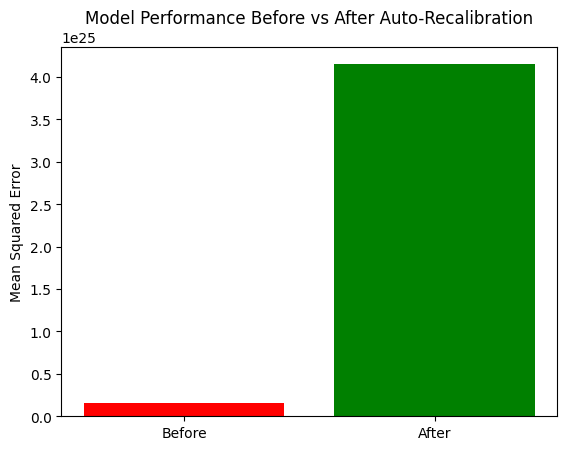

In [3]:
# Simulate sudden change in environment
X_new = np.linspace(0, 50, 500).reshape(-1, 1)
y_new = 3 * X_new.flatten() + np.random.randn(500) * 5  # Different slope

# Detect performance drift
y_new_pred = model.predict(X_new)
mse_before = mean_squared_error(y_new, y_new_pred)
print("MSE before recalibration:", mse_before)

# Intelligent recalibration by adjusting learning rate
model.set_params(eta0=0.05)
model.partial_fit(X_new, y_new)
mse_after = mean_squared_error(y_new, model.predict(X_new))
print("MSE after recalibration:", mse_after)

plt.bar(["Before", "After"], [mse_before, mse_after], color=["red", "green"])
plt.title("Model Performance Before vs After Auto-Recalibration")
plt.ylabel("Mean Squared Error")
plt.show()
